In [92]:
#Cell 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('dataset.csv')


In [93]:
#Cell 2
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
df.info()
print(df.describe().to_markdown(numalign="left", stralign="left"))

| age   | sex   | chest pain type   | resting bp s   | cholesterol   | fasting blood sugar   | resting ecg   | max heart rate   | exercise angina   | oldpeak   | ST slope   | target   |
|:------|:------|:------------------|:---------------|:--------------|:----------------------|:--------------|:-----------------|:------------------|:----------|:-----------|:---------|
| 40    | 1     | 2                 | 140            | 289           | 0                     | 0             | 172              | 0                 | 0         | 1          | 0        |
| 49    | 0     | 3                 | 160            | 180           | 0                     | 0             | 156              | 0                 | 1         | 2          | 1        |
| 37    | 1     | 2                 | 130            | 283           | 0                     | 1             | 98               | 0                 | 0         | 1          | 0        |
| 48    | 0     | 4                 | 138            | 214           |

/tmp/ipython-input-518208788.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='pastel')


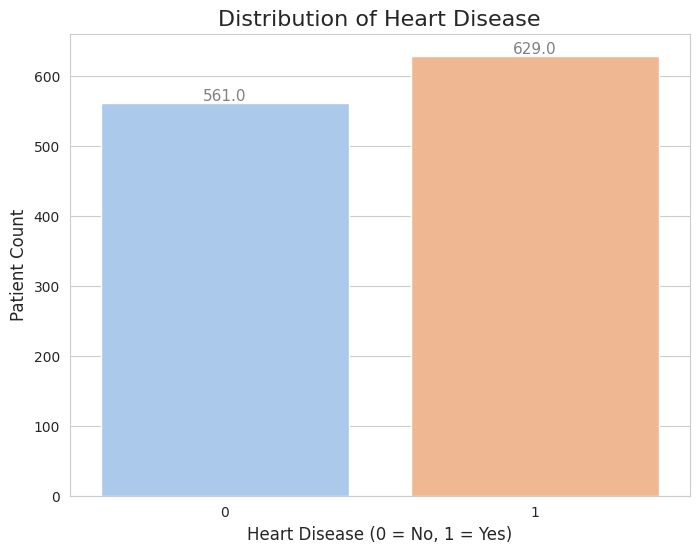

In [94]:
#Cell 3: EDA - Target Variable Distribution

if 'df' in locals():
    plt.figure(figsize=(8, 6))
    sns.countplot(x='target', data=df, palette='pastel')

    plt.title('Distribution of Heart Disease', fontsize=16)
    plt.xlabel('Heart Disease (0 = No, 1 = Yes)', fontsize=12)
    plt.ylabel('Patient Count', fontsize=12)

    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                    textcoords='offset points')


    plt.show()

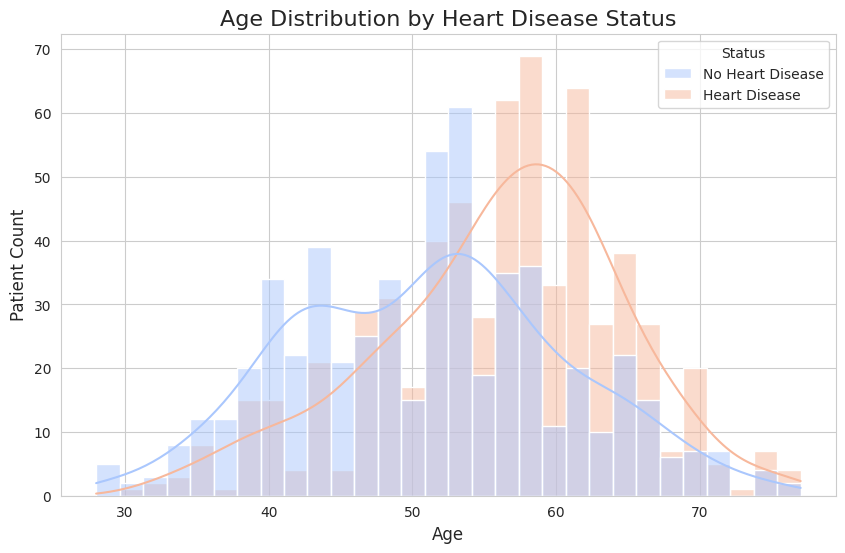

In [95]:
#Cell 4: EDA - Age Distribution vs. Heart Disease

if 'df' in locals():
    plt.figure(figsize=(10, 6))

    sns.histplot(data=df, x='age', hue='target', kde=True, palette='coolwarm', bins=30)

    plt.title('Age Distribution by Heart Disease Status', fontsize=16)
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Patient Count', fontsize=12)


    ax = plt.gca()
    handles = ax.get_legend().legend_handles
    ax.legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], title='Status')

    plt.show()


/tmp/ipython-input-4168461047.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['1: Typical', '2: Atypical', '3: Non-Anginal', '4: Asymptomatic'])


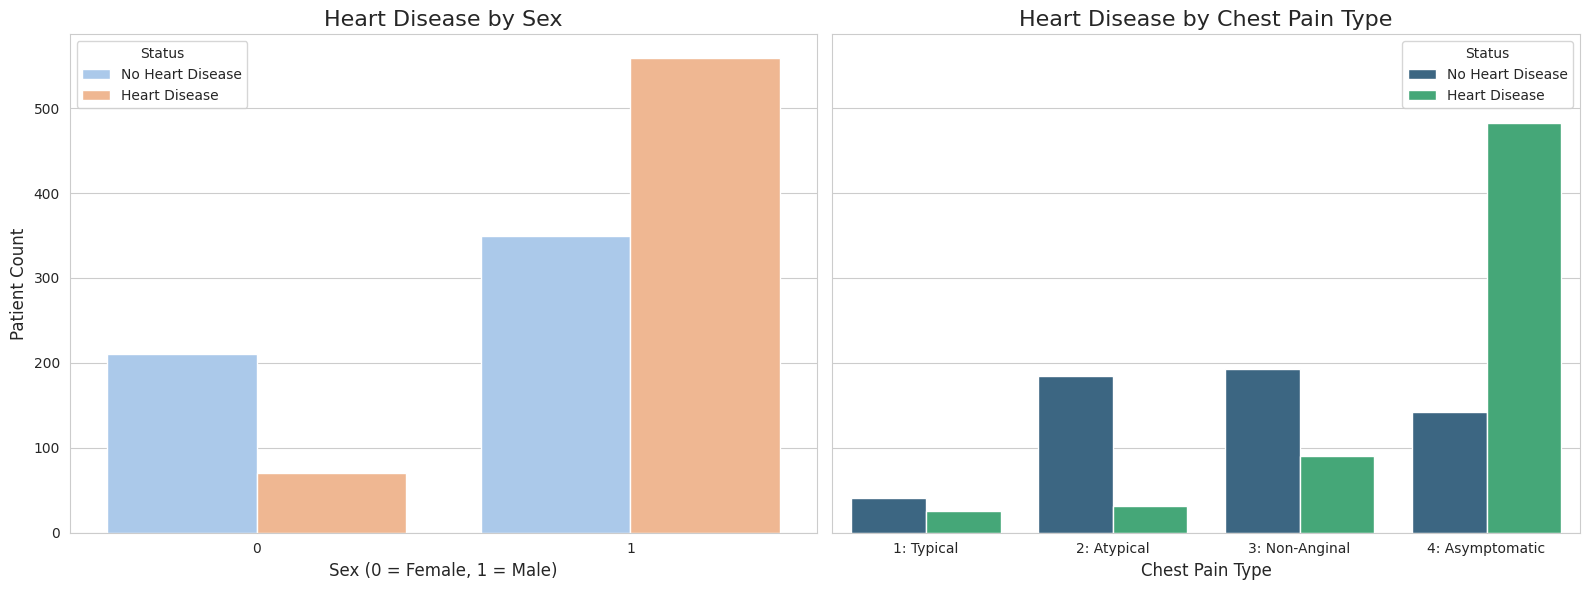

In [96]:
# Cell 5: EDA - Categorical Features

if 'df' in locals():
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)


    sns.countplot(x='sex', hue='target', data=df, palette='pastel', ax=ax1)
    ax1.set_title('Heart Disease by Sex', fontsize=16)
    ax1.set_xlabel('Sex (0 = Female, 1 = Male)', fontsize=12)
    ax1.set_ylabel('Patient Count', fontsize=12)
    handles1 = ax1.get_legend().legend_handles
    ax1.legend(handles=handles1, labels=['No Heart Disease', 'Heart Disease'], title='Status')


    sns.countplot(x='chest pain type', hue='target', data=df, palette='viridis', ax=ax2)
    ax2.set_title('Heart Disease by Chest Pain Type', fontsize=16)
    ax2.set_xlabel('Chest Pain Type', fontsize=12)
    ax2.set_ylabel('')
    handles2 = ax2.get_legend().legend_handles
    ax2.legend(handles=handles2, labels=['No Heart Disease', 'Heart Disease'], title='Status')


    ax2.set_xticklabels(['1: Typical', '2: Atypical', '3: Non-Anginal', '4: Asymptomatic'])

    plt.tight_layout()
    plt.show()


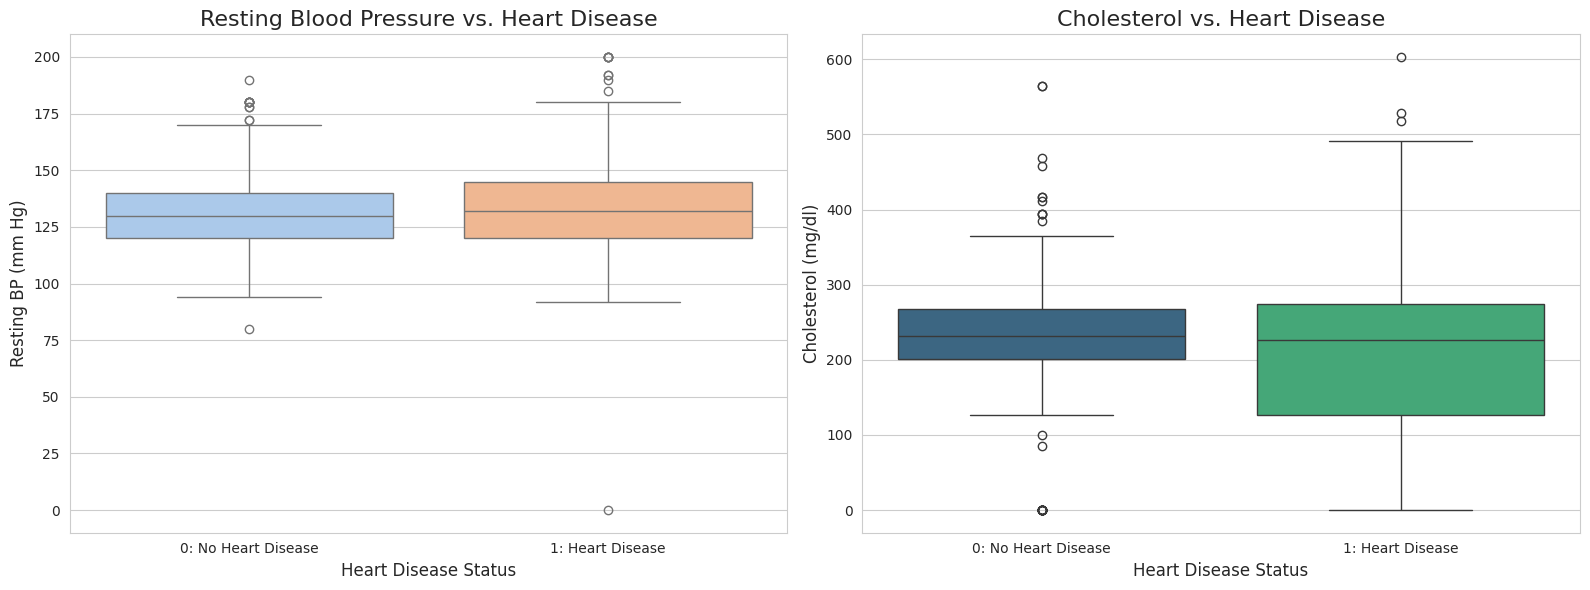

In [97]:
#Cell 6: EDA - Continuous Features (Blood Pressure, Cholesterol)

if 'df' in locals():
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))


    sns.boxplot(x='target', y='resting bp s', data=df, palette='pastel', ax=ax1, hue='target', legend=False)
    ax1.set_title('Resting Blood Pressure vs. Heart Disease', fontsize=16)
    ax1.set_xlabel('Heart Disease Status', fontsize=12)
    ax1.set_ylabel('Resting BP (mm Hg)', fontsize=12)
    ax1.set_xticks([0, 1])
    ax1.set_xticklabels(['0: No Heart Disease', '1: Heart Disease'])


    sns.boxplot(x='target', y='cholesterol', data=df, palette='viridis', ax=ax2, hue='target', legend=False)
    ax2.set_title('Cholesterol vs. Heart Disease', fontsize=16)
    ax2.set_xlabel('Heart Disease Status', fontsize=12)
    ax2.set_ylabel('Cholesterol (mg/dl)', fontsize=12)
    ax2.set_xticks([0, 1])
    ax2.set_xticklabels(['0: No Heart Disease', '1: Heart Disease'])

    plt.tight_layout()
    plt.show()


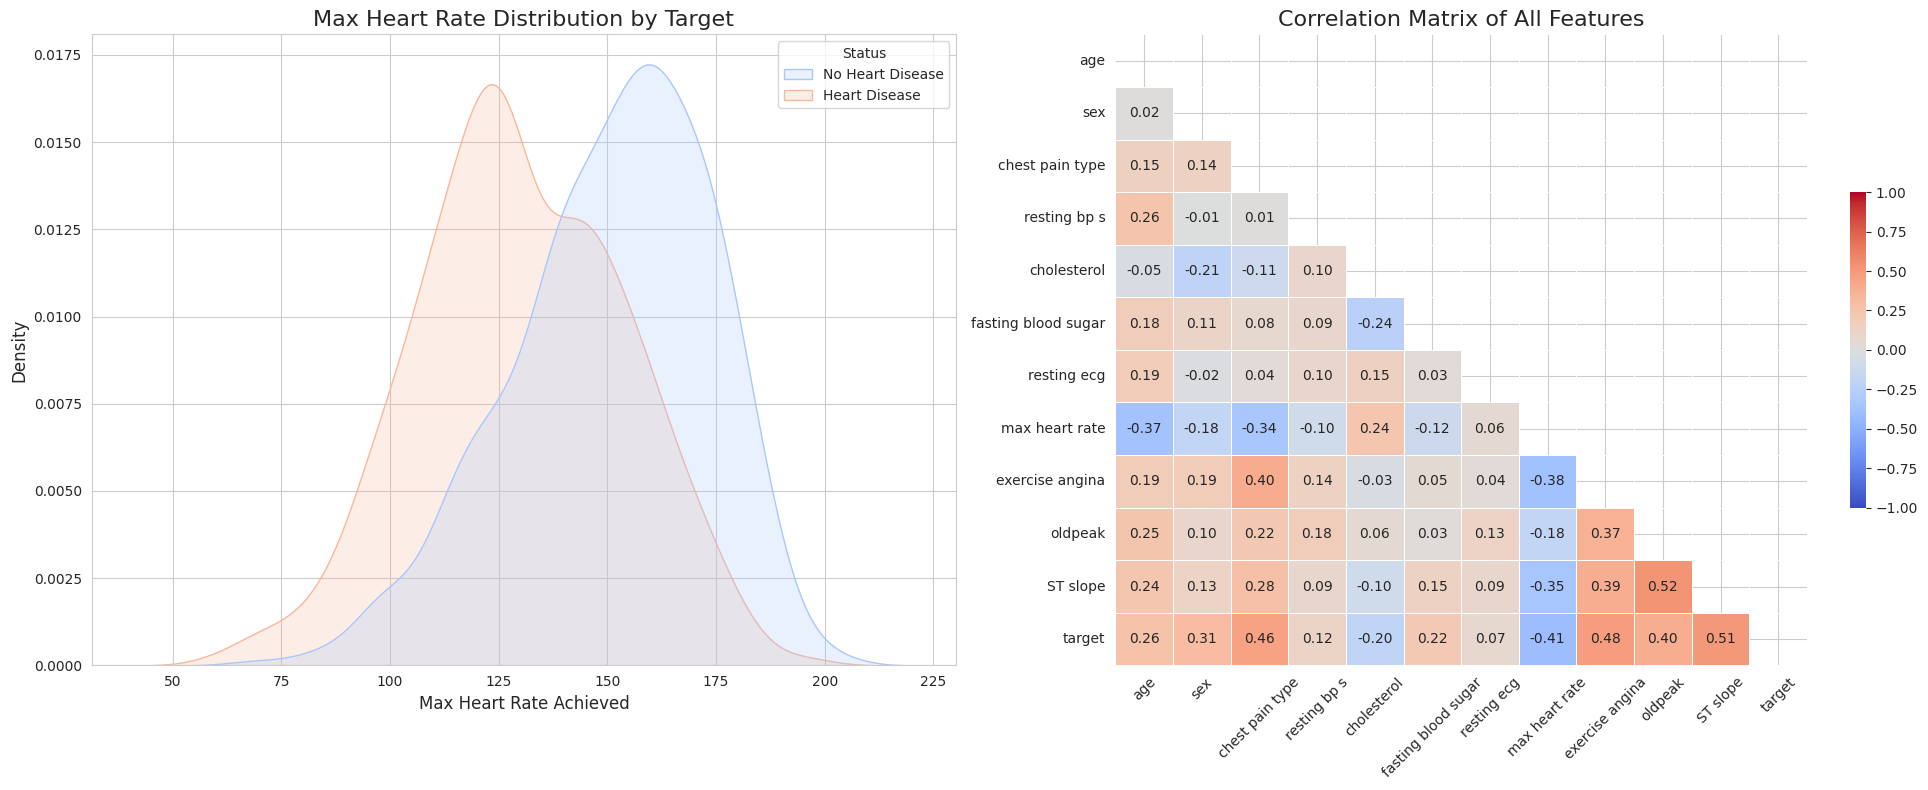

In [98]:
#Cell 7: EDA - Max Heart Rate and Correlation Heatmap

if 'df' in locals():
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

    sns.kdeplot(data=df, x='max heart rate', hue='target',
                fill=True, common_norm=False, palette='coolwarm', ax=ax1)
    ax1.set_title('Max Heart Rate Distribution by Target', fontsize=16)
    ax1.set_xlabel('Max Heart Rate Achieved', fontsize=12)
    ax1.set_ylabel('Density', fontsize=12)
    if ax1.get_legend() is not None:
        handles1 = ax1.get_legend().legend_handles
        ax1.legend(handles=handles1, labels=['No Heart Disease', 'Heart Disease'], title='Status')


    corr = df.corr()


    mask = np.triu(np.ones_like(corr, dtype=bool))


    sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
                linewidths=0.5, cbar_kws={"shrink": .5}, ax=ax2, vmin=-1, vmax=1)
    ax2.set_title('Correlation Matrix of All Features', fontsize=16)
    ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [99]:
#Cell 8: Data Preprocessing and Splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

if 'df' in locals():
    categorical_features = ['sex', 'chest pain type', 'fasting blood sugar',
                            'resting ecg', 'exercise angina', 'ST slope']
    numerical_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

    print(f"Categorical features: {categorical_features}")
    print(f"Numerical features: {numerical_features}")


    df_processed = pd.get_dummies(df, columns=categorical_features, drop_first=True)

    print(f"\nDataFrame shape before get_dummies: {df.shape}")
    print(f"DataFrame shape after get_dummies: {df_processed.shape}")
    print("New columns created from one-hot encoding:")
    print(list(df_processed.columns.drop(df.columns.drop(categorical_features))))



    X = df_processed.drop('target', axis=1)
    y = df_processed['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print(f"\nTraining set shape: {X_train.shape}")
    print(f"Testing set shape: {X_test.shape}")


    scaler = StandardScaler()


    X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])


    X_test[numerical_features] = scaler.transform(X_test[numerical_features])
    print(X_train.head().to_markdown(numalign="left", stralign="left"))


Categorical features: ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']
Numerical features: ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

DataFrame shape before get_dummies: (1190, 12)
DataFrame shape after get_dummies: (1190, 17)
New columns created from one-hot encoding:
['sex_1', 'chest pain type_2', 'chest pain type_3', 'chest pain type_4', 'fasting blood sugar_1', 'resting ecg_1', 'resting ecg_2', 'exercise angina_1', 'ST slope_1', 'ST slope_2', 'ST slope_3']

Training set shape: (952, 16)
Testing set shape: (238, 16)
|     | age        | resting bp s   | cholesterol   | max heart rate   | oldpeak   | sex_1   | chest pain type_2   | chest pain type_3   | chest pain type_4   | fasting blood sugar_1   | resting ecg_1   | resting ecg_2   | exercise angina_1   | ST slope_1   | ST slope_2   | ST slope_3   |
|:----|:-----------|:---------------|:--------------|:-----------------|:----------|:--------|:-----------------

Accuracy: 86.13%
                      precision    recall  f1-score   support

No Heart Disease (0)       0.87      0.83      0.85       112
   Heart Disease (1)       0.85      0.89      0.87       126

            accuracy                           0.86       238
           macro avg       0.86      0.86      0.86       238
        weighted avg       0.86      0.86      0.86       238



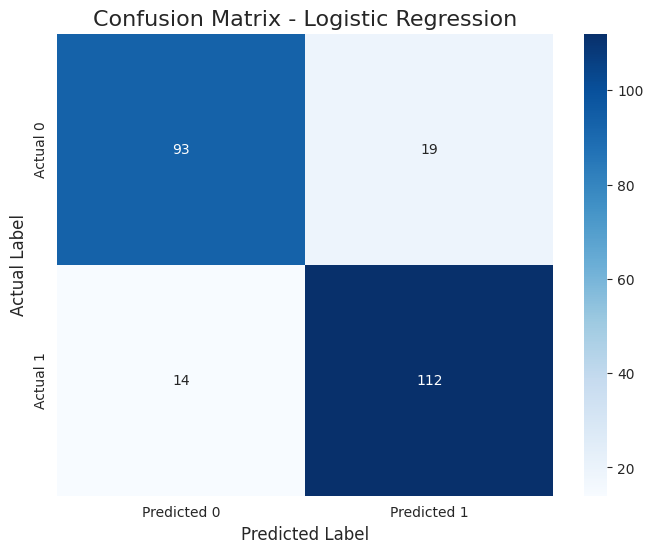

In [100]:
#Cell 9: Model 1 - Logistic Regression


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

if 'X_train' in locals():
    log_model = LogisticRegression(random_state=42, max_iter=1000)
    log_model.fit(X_train, y_train)
    y_pred_log = log_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_log)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred_log, target_names=['No Heart Disease (0)', 'Heart Disease (1)']))
    cm = confusion_matrix(y_test, y_pred_log)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix - Logistic Regression', fontsize=16)
    plt.ylabel('Actual Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.show()

else:
    print("ERROR")


Accuracy: 94.12%
                      precision    recall  f1-score   support

No Heart Disease (0)       0.93      0.95      0.94       112
   Heart Disease (1)       0.95      0.94      0.94       126

            accuracy                           0.94       238
           macro avg       0.94      0.94      0.94       238
        weighted avg       0.94      0.94      0.94       238



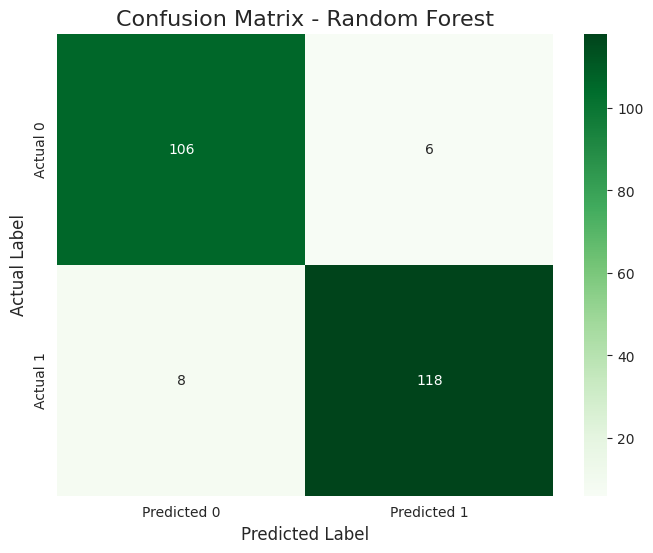

In [101]:
#Cell 10: Model 2 - Random Forest

from sklearn.ensemble import RandomForestClassifier

if 'X_train' in locals():

    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"Accuracy: {accuracy_rf * 100:.2f}%")
    print(classification_report(y_test, y_pred_rf, target_names=['No Heart Disease (0)', 'Heart Disease (1)']))

    cm_rf = confusion_matrix(y_test, y_pred_rf)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix - Random Forest', fontsize=16)
    plt.ylabel('Actual Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.show()

else:
    print("ERROR")



/tmp/ipython-input-2699899312.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='rocket')


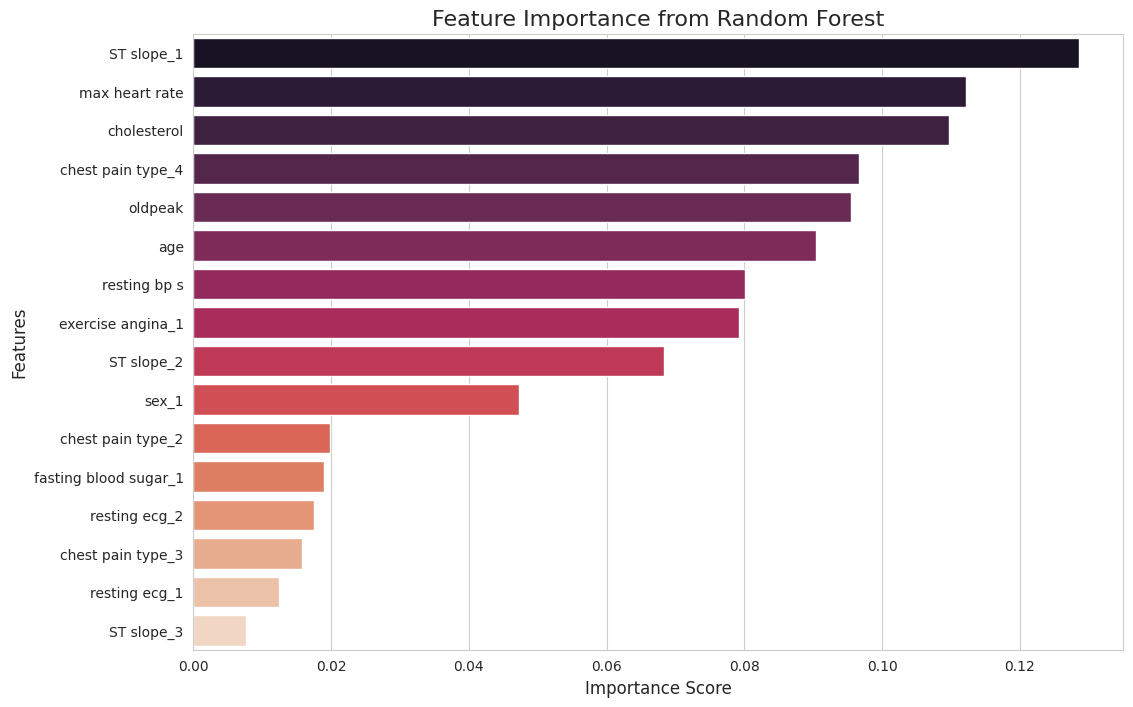

 Top 10 Most Important Features:
| feature           | importance   |
|:------------------|:-------------|
| ST slope_1        | 0.128605     |
| max heart rate    | 0.112139     |
| cholesterol       | 0.109674     |
| chest pain type_4 | 0.0965918    |
| oldpeak           | 0.0954151    |
| age               | 0.0903356    |
| resting bp s      | 0.0800877    |
| exercise angina_1 | 0.0792209    |
| ST slope_2        | 0.0683658    |
| sex_1             | 0.0473461    |


In [102]:
# Cell 11: Feature Importance from Random Forest


if 'rf_model' in locals() and 'X_train' in locals():

    importances = rf_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'feature': X_train.columns,
        'importance': importances
    })
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='rocket')

    plt.title('Feature Importance from Random Forest', fontsize=16)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.show()

    print(" Top 10 Most Important Features:")
    print(feature_importance_df.head(10).to_markdown(index=False, numalign="left", stralign="left"))

else:
    print("ERROR")



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:34:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 92.44%
                      precision    recall  f1-score   support

No Heart Disease (0)       0.91      0.93      0.92       112
   Heart Disease (1)       0.94      0.92      0.93       126

            accuracy                           0.92       238
           macro avg       0.92      0.92      0.92       238
        weighted avg       0.92      0.92      0.92       238



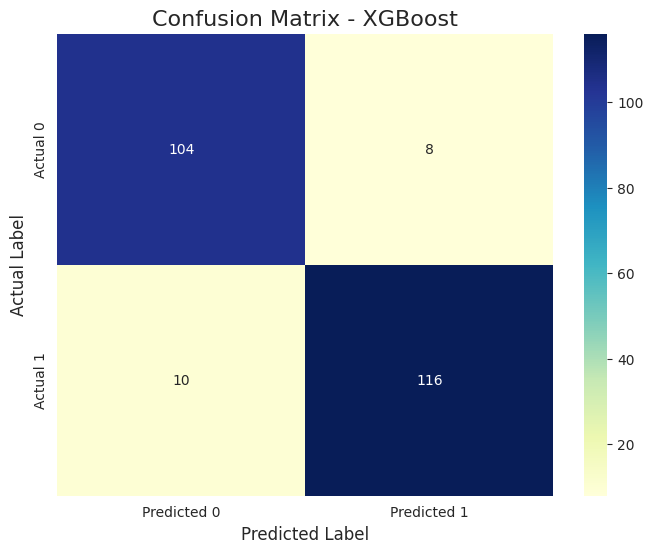

In [103]:
#Cell 12: Model 3 - XGBoost Classifier

from xgboost import XGBClassifier

if 'X_train' in locals() and 'XGBClassifier' in globals():
    xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
    print(f"Accuracy: {accuracy_xgb * 100:.2f}%")

    print(classification_report(y_test, y_pred_xgb, target_names=['No Heart Disease (0)', 'Heart Disease (1)']))

    cm_xgb = confusion_matrix(y_test, y_pred_xgb)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix - XGBoost', fontsize=16)
    plt.ylabel('Actual Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.show()

elif 'X_train' not in locals():
    print("ERROR")



Final Model Accuracies:
| Model               | Accuracy   |
|:--------------------|:-----------|
| Random Forest       | 0.941176   |
| XGBoost             | 0.92437    |
| Logistic Regression | 0.861345   |


/tmp/ipython-input-2670792061.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Accuracy', data=model_performance, palette='magma')


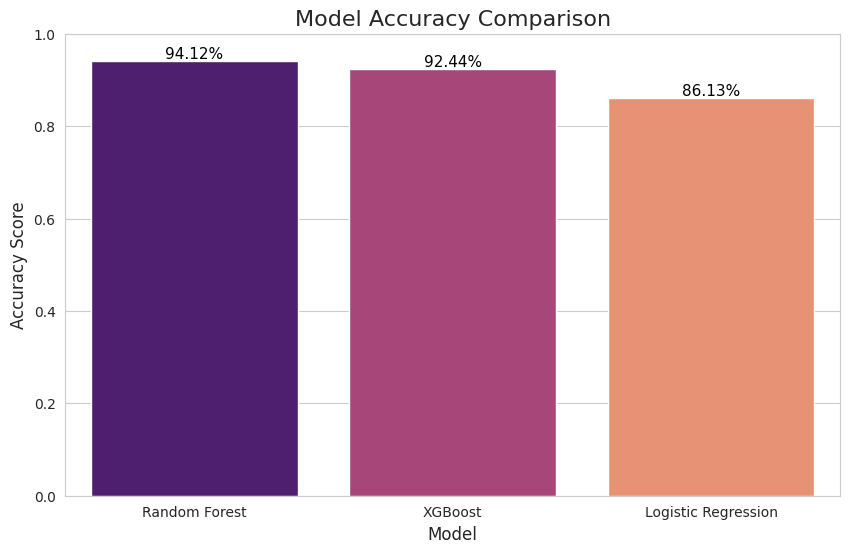

 Project Conclusion  
Based on our analysis, the Random Forest model provided the highest accuracy (94.12%) on the test data.


In [105]:
#cell 13: Model Performance Comparison

if 'accuracy' in locals() and 'accuracy_rf' in locals() and 'accuracy_xgb' in locals():
    model_performance = pd.DataFrame({
        'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
        'Accuracy': [accuracy, accuracy_rf, accuracy_xgb]
    })


    model_performance = model_performance.sort_values(by='Accuracy', ascending=False)

    print("Final Model Accuracies:")
    print(model_performance.to_markdown(index=False, numalign="left", stralign="left"))


    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Model', y='Accuracy', data=model_performance, palette='magma')

    plt.title('Model Accuracy Comparison', fontsize=16)
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Accuracy Score', fontsize=12)
    plt.ylim(0, 1.0)
    for p in ax.patches:
        ax.annotate(f'{p.get_height() * 100:.2f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black',
                    xytext=(0, 5), textcoords='offset points')

    plt.show()

    print(" Project Conclusion  ")
    best_model = model_performance.iloc[0]
    print(f"Based on our analysis, the {best_model['Model']} model provided the highest "
          f"accuracy ({best_model['Accuracy'] * 100:.2f}%) on the test data.")

else:
    print("ERROR: Missing Model Results")